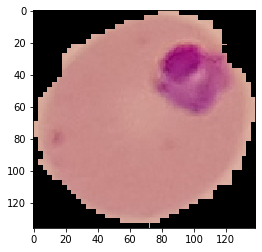

In [35]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
image = plt.imread(r'C:\Users\USER\Desktop\cell_images\test\parasitized\C127P88ThinF_IMG_20151004_111220_cell_130.png')
image.shape
plt.imshow(image)

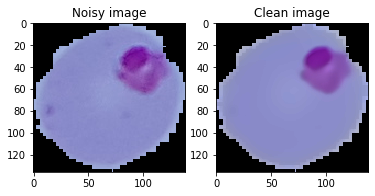

True

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r'C:\Users\USER\Desktop\cell_images\test\parasitized\C127P88ThinF_IMG_20151004_111220_cell_130.png')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,29)
plt.subplot(121),plt.imshow(img),plt.title('Noisy image')
plt.subplot(122),plt.imshow(dst),plt.title('Clean image')
plt.show()
cv2.imwrite(r'C:\Users\USER\Desktop\clean.png', dst)

#kernel = np.ones((9,9),np.uint8)
#clean = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#plt.subplot(121),plt.imshow(image),plt.title('Noisy image')
#plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(clean),plt.title('Clean image')
#plt.xticks([]), plt.yticks([])
#plt.show()

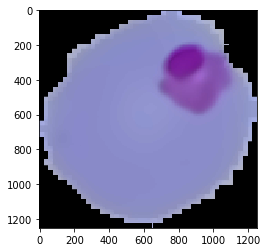

In [115]:
scale_percent=9
width=int(dst.shape[1]*scale_percent)
height=int(dst.shape[1]*scale_percent)
dimension=(width,height)
resized=cv2.resize(dst,dimension,interpolation=cv2.INTER_AREA)
plt.imshow(resized)

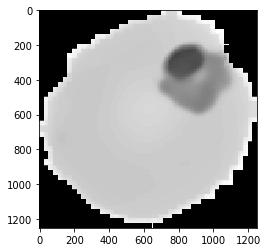

In [116]:
gray = rgb2gray(resized)
plt.imshow(gray, cmap='gray')

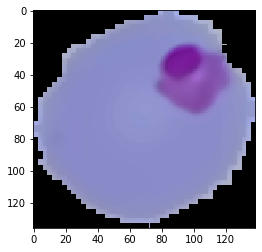

In [117]:
img = cv2.imread(r'C:\Users\USER\Desktop\clean.png')
plt.imshow(img)
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

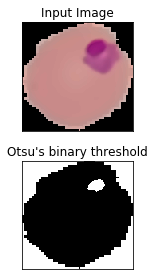

In [118]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r'C:\Users\USER\Desktop\clean.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])


plt.tight_layout()
plt.show()

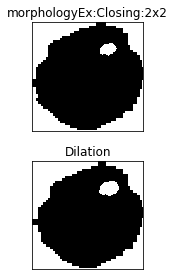

True

In [119]:
plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')

plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
cv2.imwrite(r'C:\Users\USER\Desktop\dilation.png', thresh)

(136, 139, 3)


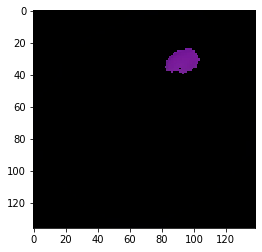

In [120]:
img = cv2.imread(r'C:\Users\USER\Desktop\clean.png')
mask = cv2.imread(r'C:\Users\USER\Desktop\dilation.png',0)
res = cv2.bitwise_and(img,img,mask = mask)
plt.imshow(res)
cv2.imwrite(r'C:\Users\USER\Desktop\parasite.png', res)
print(img.shape)

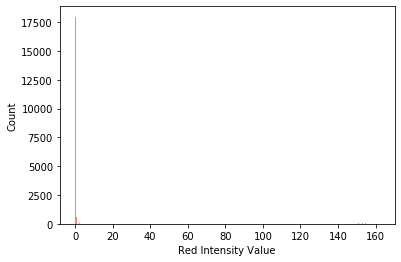

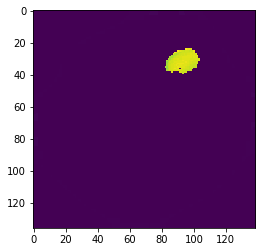

In [121]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\USER\Desktop\parasite.png')
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.xlabel('Red Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,0], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\USER\Desktop\rplane.png', x)
plt.imshow(x)

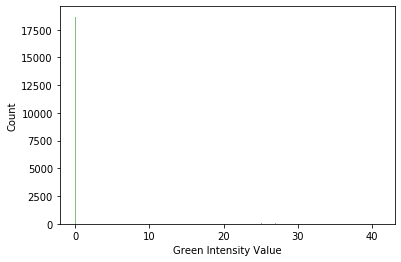

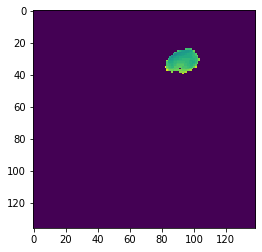

In [122]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\USER\Desktop\parasite.png')
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.xlabel('Green Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,1], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\USER\Desktop\gplane.png', x)
plt.imshow(x)

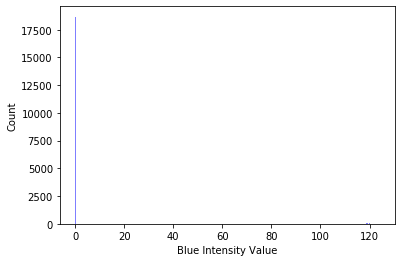

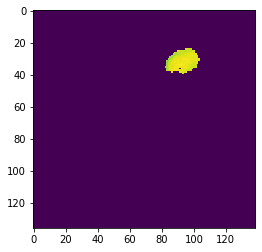

In [123]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\USER\Desktop\parasite.png')
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Blue Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,2], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\USER\Desktop\bplane.png', x)
plt.imshow(x)

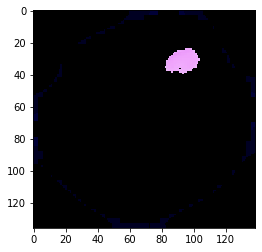

In [124]:
import cv2 
import numpy as np 
  
# Open the image. 
img = cv2.imread(r'C:\Users\USER\Desktop\parasite.png') 
  
# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
# Save the output. 
cv2.imwrite(r'C:\Users\USER\Desktop\log_transformed.png', log_transformed) 
plt.imshow(log_transformed)

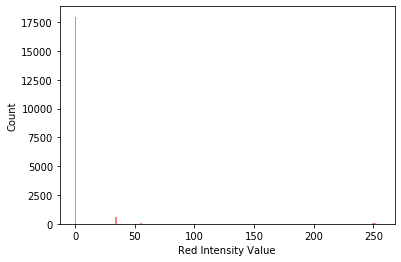

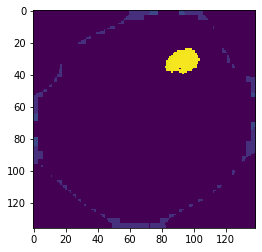

In [125]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\USER\Desktop\log_transformed.png')
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.xlabel('Red Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,0], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\USER\Desktop\log_transformed_r.png', x)
plt.imshow(x)

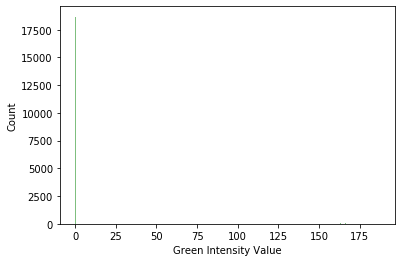

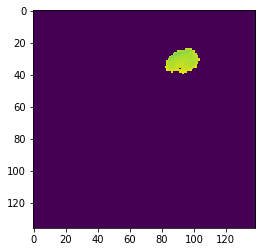

In [126]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\USER\Desktop\log_transformed.png')
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'green', alpha = 0.5)
_ = plt.xlabel('Green Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,1], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\USER\Desktop\log_transformed_g.png', x)
plt.imshow(x)


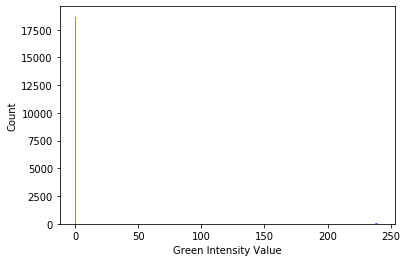

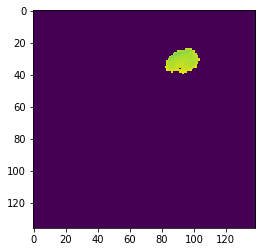

In [127]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread(r'C:\Users\USER\Desktop\log_transformed.png')
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
_ = plt.xlabel('Green Intensity Value')
_ = plt.ylabel('Count')
plt.show()
x = np.array(image[:,:,1], dtype = np.uint8) 
cv2.imwrite(r'C:\Users\USER\Desktop\log_transformed_b.png', x)
plt.imshow(x)

In [128]:
image = io.imread(r'C:\Users\USER\Desktop\log_transformed_r.png')
type(image)
image.shape

(136, 139)

In [129]:
image = io.imread(r'C:\Users\USER\Desktop\log_transformed_r.png')
a = np.array(image[:,:,], dtype = np.uint8)
print("MATRIX FOR R PLANE HISTOGRAM WITH COUNTS:")
#a.flatten()
#print (a)
#for i in a.flatten():
#    print(i)

d = dict()
for i in range (0,256):
    d[i]=0

x = []
for i in range (0,256):
    x.append(i)
#print(x)    

y = []
for i in range (0,256):
    y.append(d[i])
#print(y)

num = 0
den = 0
for i in a.flatten():
    d[i] = d.get(i,0) + 1

for i in x:
        b = d.get(i,0) + 1
        
        num = num + b*i
        den = den + b
cogr = num / den
print (d)
print("COG of R plane=",cogr)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
image = io.imread(r'C:\Users\USER\Desktop\log_transformed_g.png')
b = np.array(image[:,:,], dtype = np.uint8)
print("MATRIX FOR G PLANE HISTOGRAM WITH COUNTS:")
#b.flatten()
#print (a)
#for i in b.flatten():
#    print(i)

e = dict()
for i in range (0,256):
    e[i]=0

x = []
for i in range (0,256):
    x.append(i)
#print(x)    

y = []
for i in range (0,256):
    y.append(e[i])
#print(y)

num = 0
den = 0
for i in b.flatten():
    e[i] = e.get(i,0) + 1

for i in x:
        k = e.get(i,0) + 1
        num = num + k*i
        den = den + k
cogg = num / den
print (e)
print("COG of G plane=",cogg)

print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
image = io.imread(r'C:\Users\USER\Desktop\log_transformed_b.png')
c = np.array(image[:,:,], dtype = np.uint8)
print("MATRIX FOR B PLANE HISTOGRAM WITH COUNTS:")
#a.flatten()
#print (a)
#for i in a.flatten():
#    print(i)

f = dict()
for i in range (0,256):
    f[i]=0

x = []
for i in range (0,256):
    x.append(i)
#print(x)    

y = []
for i in range (0,256):
    y.append(f[i])
#print(y)

num = 0
den = 0
for i in c.flatten():
    f[i] = f.get(i,0) + 1

for i in x:
        l = f.get(i,0) + 1
        num = num + l*i
        den = den + l
cogb = num / den
print (f)
print("COG of B plane=",cogb)

MATRIX FOR R PLANE HISTOGRAM WITH COUNTS:
{0: 17966, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 626, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 75, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132:

In [130]:
print("%%%%%%%%%%%%%%% Partition of the R matrix using COG %%%%%%%%%%%%%%%")
image1 = io.imread(r'C:\Users\USER\Desktop\log_transformed_r.png')
h, w = image1.shape

for r in range(h):
    for c in range(w):
        if image1[r, c] <= cogr:
            image1[r, c] = 0
        else:
            image1[r, c] = 1
print(image1)

print("%%%%%%%%%%%%%%% Partition of the G matrix using COG %%%%%%%%%%%%%%%")
image2 = io.imread(r'C:\Users\USER\Desktop\log_transformed_g.png')
h, w = image2.shape

for r in range(h):
    for c in range(w):
        if image2[r, c] <= cogg:
            image2[r, c] = 0
        else:
            image2[r, c] = 1
print(image2)

print("%%%%%%%%%%%%%%% Partition of the B matrix using COG %%%%%%%%%%%%%%%")
image3 = io.imread(r'C:\Users\USER\Desktop\log_transformed_b.png')
h, w = image3.shape

for r in range(h):
    for c in range(w):
        if image3[r, c] <= cogb:
            image3[r, c] = 0
        else:
            image3[r, c] = 1
print(image3)
print(image3.shape)

%%%%%%%%%%%%%%% Partition of the R matrix using COG %%%%%%%%%%%%%%%
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
%%%%%%%%%%%%%%% Partition of the G matrix using COG %%%%%%%%%%%%%%%
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
%%%%%%%%%%%%%%% Partition of the B matrix using COG %%%%%%%%%%%%%%%
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(136, 139)


In [131]:
bins0 = 0
bins1 = 0
bins2 = 0
bins3 = 0
bins4 = 0
bins5 = 0
bins6 = 0
bins7 = 0
for i in range(h):
    for j in range(w):
        r= image1[i,j];
        g= image2[i,j];
        b= image3[i,j];
        
        if r==0 and g==0 and b==0:
                bins0= bins0 + 1
        elif r==0 and g==0 and b==1:
                bins1= bins1 + 1
        elif r==0 and g==1 and b==0:
                bins2= bins2 + 1
        elif r==0 and g==1 and b==1:
                bins3= bins3 + 1
        elif r==1 and g==0 and b==0:
                bins4= bins4 + 1
        elif r==1 and g==0 and b==1:
                bins5= bins5 + 1
        elif r==1 and g==1 and b==0:
                bins6= bins6 + 1
        elif r==1 and g==1 and b==1:
                bins7= bins7 + 1

print("Bins 0:",bins0)
print("Bins 1:",bins1)
print("Bins 2:",bins2)
print("Bins 3:",bins3)
print("Bins 4:",bins4)
print("Bins 5:",bins5)
print("Bins 6:",bins6)
print("Bins 7:",bins7)

Bins 0: 17966
Bins 1: 0
Bins 2: 0
Bins 3: 0
Bins 4: 701
Bins 5: 0
Bins 6: 0
Bins 7: 237
